In [95]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [96]:
df = pd.read_csv("breast-cancer.csv.xls")

In [97]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [98]:
df.isna().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [99]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
281    False
282    False
283    False
284    False
285    False
Length: 286, dtype: bool

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [101]:
x = df[['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad']] #Feature
y = df["irradiat"] #Target

# ENCODING DATA

In [102]:
x = pd.get_dummies(x)

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
O = LabelEncoder()

In [105]:
y = O.fit_transform(y)

# SPLIT DATA

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [107]:
print(f'panjang x train : {len(x_train)}\n',
f'panjang y train : {len(y_train)}\n',
f'panjang x test : {len(x_test)}\n',
f'panjang y test : {len(y_test)}\n')

panjang x train : 200
 panjang y train : 200
 panjang x test : 86
 panjang y test : 86



In [108]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   deg-malig              286 non-null    int64
 1   age_20-29              286 non-null    uint8
 2   age_30-39              286 non-null    uint8
 3   age_40-49              286 non-null    uint8
 4   age_50-59              286 non-null    uint8
 5   age_60-69              286 non-null    uint8
 6   age_70-79              286 non-null    uint8
 7   menopause_ge40         286 non-null    uint8
 8   menopause_lt40         286 non-null    uint8
 9   menopause_premeno      286 non-null    uint8
 10  tumor-size_0-4         286 non-null    uint8
 11  tumor-size_10-14       286 non-null    uint8
 12  tumor-size_15-19       286 non-null    uint8
 13  tumor-size_20-24       286 non-null    uint8
 14  tumor-size_25-29       286 non-null    uint8
 15  tumor-size_30-34       286 non-null    u

# Data standarisasi

In [109]:
ss = StandardScaler()

In [110]:
x_scaled_train = ss.fit_transform(x_train)
x_scaled_test = ss.fit_transform(x_test)

In [111]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

# MEMBUAT MODEL

In [112]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

#Input Layer
model.add(Dense(50, activation='relu', input_dim=39))

#Output Layer
model.add(Dense(2, activation='sigmoid')) #output layer harus disamakan dengan jumlah class, semakin banyak jumlah neuron semakin kompleks modelnya jadi bisa overfitting

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                2000      
                                                                 
 dense_9 (Dense)             (None, 2)                 102       
                                                                 
Total params: 2,102
Trainable params: 2,102
Non-trainable params: 0
_________________________________________________________________


# Import Library

In [113]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

# Mengoptimasi Model

In [114]:
# Import the early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='accuracy', #dilihat berdasarkan validasi accuracy atau accuracy saja, tetapi monitor hanya bisa memasukkan 1 saja
                                patience=20)#jadi jika di 20 epoch selanjutnya itu tidak berubah maka diberentikan


In [115]:
model.compile(
    optimizer=Adam(),
    loss = binary_crossentropy,
    metrics = ['accuracy']
)

# Melatih model training

In [116]:
history = model.fit(
    x = x_scaled_train, 
    y = y_train,
    validation_data=(x_scaled_test,y_test),
    epochs=120,
    verbose=1,
    callbacks=[monitor_val_acc]
)

Epoch 1/120
7/7 [==============================] - 1s 32ms/step - loss: 1.0511 - accuracy: 0.2450 - val_loss: 0.9023 - val_accuracy: 0.2907
Epoch 2/120
7/7 [==============================] - 0s 7ms/step - loss: 0.9381 - accuracy: 0.3000 - val_loss: 0.8247 - val_accuracy: 0.4186
Epoch 3/120
7/7 [==============================] - 0s 8ms/step - loss: 0.8487 - accuracy: 0.3700 - val_loss: 0.7570 - val_accuracy: 0.5233
Epoch 4/120
7/7 [==============================] - 0s 9ms/step - loss: 0.7692 - accuracy: 0.5050 - val_loss: 0.7038 - val_accuracy: 0.5814
Epoch 5/120
7/7 [==============================] - 0s 8ms/step - loss: 0.7038 - accuracy: 0.6450 - val_loss: 0.6601 - val_accuracy: 0.6977
Epoch 6/120
7/7 [==============================] - 0s 8ms/step - loss: 0.6509 - accuracy: 0.7000 - val_loss: 0.6244 - val_accuracy: 0.7558
Epoch 7/120
7/7 [==============================] - 0s 7ms/step - loss: 0.6069 - accuracy: 0.7550 - val_loss: 0.5957 - val_accuracy: 0.7907
Epoch 8/120
7/7 [=========

In [117]:
model.evaluate(x_scaled_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7558


[0.5669370889663696, 0.7558139562606812]

# Visualisasi

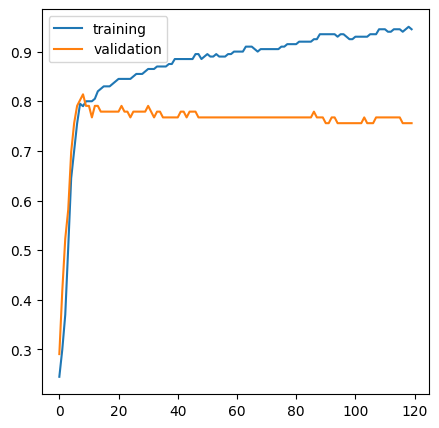

In [118]:
plt.figure(1, figsize=(5,5))
plt.plot(range(len(history.history['accuracy'])), 
         history.history['accuracy'],
         label='training')
plt.plot(range(len(history.history['val_accuracy'])), 
         history.history['val_accuracy'],
         label='validation')
plt.legend()
plt.show()

In [153]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [140]:
y_pred = model.predict(x_scaled_test)

3/3 [==============================] - 0s 1ms/step


Hasil Probabilitas
- jika lebih besar kiri maka mengembalikan 0 
- jika lbeih besar kanan mengembalikan 1

In [156]:
y_pred

array([[8.1526917e-01, 8.8798493e-02],
       [9.9729502e-01, 4.3035971e-04],
       [8.9035869e-01, 1.2371157e-01],
       [6.2873816e-01, 3.3290777e-01],
       [9.6292126e-01, 4.7819145e-02],
       [9.9146295e-01, 4.5046946e-03],
       [5.6098998e-01, 2.7844447e-01],
       [1.3712789e-01, 7.9322153e-01],
       [9.9968457e-01, 1.2401780e-03],
       [9.9636310e-01, 3.4121710e-03],
       [2.0514296e-01, 7.2804368e-01],
       [7.1697962e-01, 2.4537072e-01],
       [2.3858772e-01, 7.1611249e-01],
       [8.2753770e-02, 8.7283570e-01],
       [9.8307902e-01, 7.7994736e-03],
       [9.9798208e-01, 1.6267040e-03],
       [5.1872915e-01, 5.2261513e-01],
       [7.4472629e-02, 9.5514804e-01],
       [9.7516382e-01, 1.2642133e-02],
       [9.9913061e-01, 2.4966491e-04],
       [5.5286276e-01, 4.8214716e-01],
       [7.4150312e-01, 3.2015577e-01],
       [9.3778962e-01, 2.1150900e-02],
       [8.7069583e-01, 1.5270083e-01],
       [9.9324965e-01, 4.4825887e-03],
       [7.3460862e-02, 9.

Untuk Mengembalikkan index hasil prediksi

In [157]:
y_predict = np.argmax(y_pred, axis=1).tolist()
y_predict[0:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [161]:
y_aktual = np.argmax(y_test, axis=1).tolist()
y_aktual[0:10]

[0, 0, 0, 1, 0, 0, 1, 0, 0, 0]

Confusion matrixnya

In [151]:
cm = confusion_matrix(y_predict, y_aktual)

In [152]:
print(cm)

[[57 14]
 [ 7  8]]


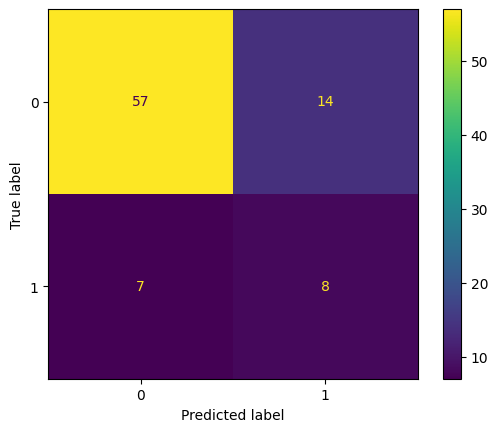

In [155]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Confusion Matrix
- 7 false negative
- 8 true positive
- 57 true negative
- 14 false positive

In [162]:
from sklearn.metrics import classification_report

In [164]:
print(classification_report(y_predict, y_aktual))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        71
           1       0.36      0.53      0.43        15

    accuracy                           0.76        86
   macro avg       0.63      0.67      0.64        86
weighted avg       0.80      0.76      0.77        86



- Precision dari semua class yang diprediksi positive berapa jumlah yang benar benar positive hasilnya 
- Recall dari semua class yang positive berapa yang betul betul positive
- f1-score nilai tengah rata rata dari precission dan recall 